##Imports and Scripts

In [ ]:
%%capture
!pip install pympi-ling


In [ ]:
data = []
import os
for filename in os.listdir('/content/drive/MyDrive/Internship/ReKe_Keypoints_r8904530ijyiopf9034jiop4g90j0yh795640h38j'):
    if filename.endswith("json"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Parse JSON files into CSV
!python "/content/drive/MyDrive/Internship/Scripts/JSON Parser.py" "/content/drive/MyDrive/Internship/SuJuCut/Keypoints"
#Input file: /content/drive/MyDrive/Internship/Reke5min/left_dataframe.csv


Found:  14876 json keypoint frame files
Writing Done


In [ ]:
#Do all preprocessing and output as pandas dataframe
!python "/content/drive/MyDrive/Internship/Scripts/Data Preprocessing.py" "/content/drive/MyDrive/Internship/SuJuCut/Keypoints" "/content/drive/MyDrive/Internship/SuJuCut/left_dataframe.csv" "/content/drive/MyDrive/Internship/SuJuCut/right_dataframe.csv" "/content/drive/MyDrive/Internship/SuJuCut/SuJu16jan7_11juli17.eaf" "True" "/content/drive/MyDrive/Internship/SuJuCut/Output" 

Centering x keypoints
IDs corrected
Frames:  14875
Labels Added
Missing Data Filled
X centering keypoints extracted
Keypoints Centered
Tuples Split
Columns Renamed
Left [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import pandas as pd
#final_df = pd.read_csv('/content/drive/MyDrive/Internship/ReKeFinal/Clean Output/final_dataframe_clean.csv')
#final_df = pd.read_csv('/content/drive/MyDrive/Internship/KN5Output/final_dataframe_clean.csv')
final_df = pd.read_csv('/content/drive/MyDrive/Internship/SuJuCut/Output/final_dataframe_clean.csv')

final_df = final_df.drop(final_df.columns[0], axis = 1)
final_df['Nose_x_left_person'] = [0.0] * final_df.shape[0]
cols = final_df.columns
temp = cols[-1]
cols = cols.insert(0, temp)
cols = cols[:-1]
final_df = final_df[cols]


In [ ]:
#Extract Left side of dataframe
left_cols = []
for col_name in final_df.columns:
  if "_left_person" in col_name:
    left_cols.append(col_name)
left_final = final_df[left_cols]

In [ ]:
#Extract Right side of dataframe
right_cols = []
for col_name in final_df.columns:
  if "_right_person" in col_name:
    right_cols.append(col_name)
right_final = final_df[right_cols]

##Plot one frame

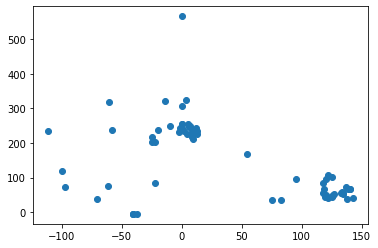

In [ ]:
coords = []
for i in range(left_final.shape[1]):
  if i %2 == 0:
    coords.append(left_final.iloc[4:5].to_numpy()[0][i:i+2])

import numpy as np
import matplotlib.pyplot as plt
x, y = np.array(coords).T
# plot our list in X,Y coordinates
plt.scatter(x, 567-y)
plt.show()

##Angle Extraction

In [ ]:
import numpy as np

from math import atan2, pi
def angle(A, B, C):
    
    Ax, Ay = A[0]-B[0], A[1]-B[1]
    Cx, Cy = C[0]-B[0], C[1]-B[1]
    my_list = []
    my_list.append(A)
    my_list.append(B)
    my_list.append(C)
    my_list = np.array(my_list)
    x, y = my_list.T

    a = atan2(Ay, Ax)
    c = atan2(Cy, Cx)
    if a < 0: a += pi*2
    if c < 0: c += pi*2
    result =  (pi*2 + c - a) * (180/pi) #if a > c else (c - a)* (180/pi)
    if result > 180:
      result = result-180
    return result

#All angles in 25 keypoint body
angles = {}
#Left side of body
angles["Nose,LEar"] = ["LEar", "LEye", "Nose"]
angles["LEye,Neck"] = ["LEye", "Nose", "Neck"]
angles["Nose,LShoulder"] = ["Nose", "Neck", "LShoulder"]
angles["Neck,LElbow"] = ["Neck", "LShoulder", "LElbow"]
angles["LShoulder,LWrist"] = ["LShoulder", "LElbow", "LWrist"]
angles["LShoulder,MidHip"] = ["LShoulder", "Neck", "MidHip"]
angles["Neck,LHip"] = ["Neck", "MidHip", "LHip"]
angles["MidHip,LKnee"] = ["MidHip", "LHip", "LKnee"]
angles["LHip,LAnkle"] = ["LHip", "LKnee", "LAnkle"]
angles["LKnee,LBigToe"] = ["LKnee", "LAnkle", "LBigToe"]
angles["LHeel,LBigToe"] = ["LHeel", "LAnkle", "LBigToe"]
angles["LAnkle,LSmallToe"] = ["LAnkle", "LBigToe", "LSmallToe"]

#Right side of body
angles["Nose,REar"] = ["REar", "REye", "Nose"]
angles["REye,Neck"] = ["REye", "Nose", "Neck"]
angles["Nose,RShoulder"] = ["Nose", "Neck", "RShoulder"]
angles["Neck,RElbow"] = ["Neck", "RShoulder", "RElbow"]
angles["RShoulder,RWrist"] = ["RShoulder", "RElbow", "RWrist"]
angles["RShoulder,MidHip"] = ["RShoulder", "Neck", "MidHip"]
angles["Neck,RHip"] = ["Neck", "MidHip", "RHip"]
angles["MidHip,RKnee"] = ["MidHip", "RHip", "RKnee"]
angles["RHip,RAnkle"] = ["RHip", "RKnee", "RAnkle"]
angles["RKnee,RBigToe"] = ["RKnee", "RAnkle", "RBigToe"]
angles["RHeel,RBigToe"] = ["RHeel", "RAnkle", "RBigToe"]
angles["RAnkle,RSmallToe"] = ["RAnkle", "RBigToe", "RSmallToe"]

#Left Hand
angles['LWrist,LThumb2Knuckles'] = ["LWrist", "LThumb1CMC", "LThumb2Knuckles"]
angles['LThumb1CMC,LThumb3IP'] = ["LThumb1CMC", "LThumb2Knuckles", "LThumb3IP"]
angles['LThumb2Knuckles,LThumb4FingerTip'] = ["LThumb2Knuckles", "LThumb3IP", "LThumb4FingerTip"]

angles['LWrist,LIndex2PIP'] = ["LWrist", "LIndex1Knuckles", "LIndex2PIP"]
angles['LIndex1Knuckles,LIndex3DIP'] = ["LIndex1Knuckles", "LIndex2PIP", "LIndex3DIP"]
angles['LIndex2PIP,LIndex4FingerTip'] = ["LIndex2PIP", "LIndex3DIP", "LIndex4FingerTip"]

angles['LWrist,LMiddle2PIP'] = ["LWrist", "LMiddle1Knuckles", "LMiddle2PIP"]
angles['LMiddle1Knuckles,LMiddle3DIP'] = ["LMiddle1Knuckles", "LMiddle2PIP", "LMiddle3DIP"]
angles['LMiddle2PIP,LMiddle4FingerTip'] = ["LMiddle2PIP", "LMiddle3DIP", "LMiddle4FingerTip"]

angles['LWrist,LRing2PIPs'] = ["LWrist", "LRing1Knuckles", "LRing2PIP"]
angles['LRing1Knuckles,LRing3DIP'] = ["LRing1Knuckles", "LRing2PIP", "LRing3DIP"]
angles['LRing2PIP,LRing4FingerTip'] = ["LRing2PIP", "LRing3DIP", "LRing4FingerTip"]

angles['LWrist,LPinky2PIPs'] = ["LWrist", "LPinky1Knuckles", "LPinky2PIP"]
angles['LPinky1Knuckles,LPinky3DIP'] = ["LPinky1Knuckles", "LPinky2PIP", "LPinky3DIP"]
angles['LPinky2PIP,LPinky4FingerTip'] = ["LPinky2PIP", "LPinky3DIP", "LPinky4FingerTip"]


#Right Hand
angles['RWrist,RThumb2Knuckles'] = ["RWrist", "RThumb1CMC", "RThumb2Knuckles"]
angles['RThumb1CMC,RThumb3IP'] = ["RThumb1CMC", "RThumb2Knuckles", "RThumb3IP"]
angles['RThumb2Knuckles,RThumb4FingerTip'] = ["RThumb2Knuckles", "RThumb3IP", "RThumb4FingerTip"]

angles['RWrist,RIndex2PIP'] = ["RWrist", "RIndex1Knuckles", "RIndex2PIP"]
angles['RIndex1Knuckles,RIndex3DIP'] = ["RIndex1Knuckles", "RIndex2PIP", "RIndex3DIP"]
angles['RIndex2PIP,RIndex4FingerTip'] = ["RIndex2PIP", "RIndex3DIP", "RIndex4FingerTip"]

angles['RWrist,RMiddle2PIP'] = ["RWrist", "RMiddle1Knuckles", "RMiddle2PIP"]
angles['RMiddle1Knuckles,RMiddle3DIP'] = ["RMiddle1Knuckles", "RMiddle2PIP", "RMiddle3DIP"]
angles['RMiddle2PIP,RMiddle4FingerTip'] = ["RMiddle2PIP", "RMiddle3DIP", "RMiddle4FingerTip"]

angles['RWrist,RRing2PIPs'] = ["RWrist", "RRing1Knuckles", "RRing2PIP"]
angles['RRing1Knuckles,RRing3DIP'] = ["RRing1Knuckles", "RRing2PIP", "RRing3DIP"]
angles['RRing2PIP,RRing4FingerTip'] = ["RRing2PIP", "RRing3DIP", "RRing4FingerTip"]

angles['RWrist,RPinky2PIPs'] = ["RWrist", "RPinky1Knuckles", "RPinky2PIP"]
angles['RPinky1Knuckles,RPinky3DIP'] = ["RPinky1Knuckles", "RPinky2PIP", "RPinky3DIP"]
angles['RPinky2PIP,RPinky4FingerTip'] = ["RPinky2PIP", "RPinky3DIP", "RPinky4FingerTip"]

In [ ]:
left_final.head()

,Nose_x_left_person,Nose_y_left_person,Neck_x_left_person,Neck_y_left_person,RShoulder_x_left_person,RShoulder_y_left_person,RElbow_x_left_person,RElbow_y_left_person,RWrist_x_left_person,RWrist_y_left_person,...,RRing4FingerTip_x_left_person,RRing4FingerTip_y_left_person,RPinky1Knuckles_x_left_person,RPinky1Knuckles_y_left_person,RPinky2PIP_x_left_person,RPinky2PIP_y_left_person,RPinky3DIP_x_left_person,RPinky3DIP_y_left_person,RPinky4FingerTip_x_left_person,RPinky4FingerTip_y_left_person
0,0.0,240.137,-61.110,324.775,-115.9533,332.560,-130.0289,456.380,-15.639,457.956,...,22.576,475.263,7.188,471.533,25.374,480.392,21.643,478.994,23.975,476.196
1,0.0,240.193,-56.441,323.227,-114.3417,330.947,-126.8346,456.295,-21.937,407.797,...,14.563,394.619,11.737,396.974,7.026,412.990,11.266,414.403,13.621,411.577
2,0.0,244.918,-57.957,326.327,-112.7858,329.458,-103.4270,446.923,-26.656,362.358,...,7.990,326.537,6.128,320.019,7.059,351.676,9.852,342.365,5.197,339.106
3,0.0,257.432,-57.929,323.223,-111.1800,329.457,-95.4910,446.918,-25.094,356.028,...,9.384,316.194,6.104,316.194,13.133,342.435,19.693,332.126,17.819,327.440
4,0.0,258.984,-57.951,329.408,-111.2642,331.007,-100.2490,448.529,-25.088,363.907,...,8.480,329.061,1.560,333.213,9.403,353.973,12.632,341.517,8.941,337.827


In [ ]:
import pandas as pd

angle_frames_left = pd.DataFrame()

for index, row in left_final.iterrows():
  extracted_features = []
  for key in angles.keys():
    coordlist = []
    for value in angles[key]:
      temp = []
      temp.append(row[value + "_x_left_person"])
      temp.append(row[value + "_y_left_person"])
      coordlist.append(temp)
    
    result = angle(*coordlist)
    extracted_features.append(result)

  if len(extracted_features) != 54:
    print("There is a problem")

  extracted_features = pd.DataFrame(extracted_features).T
  angle_frames_left = angle_frames_left.append(extracted_features, ignore_index = True)
angle_frames_left.columns = list(angles.keys())
print(angle_frames_left.shape)
print(angle_frames_left.shape[0] == left_final.shape[0])
angle_frames_left.head()


(14875, 54)
True


,"Nose,LEar","LEye,Neck","Nose,LShoulder","Neck,LElbow","LShoulder,LWrist","LShoulder,MidHip","Neck,LHip","MidHip,LKnee","LHip,LAnkle","LKnee,LBigToe",...,"RIndex2PIP,RIndex4FingerTip","RWrist,RMiddle2PIP","RMiddle1Knuckles,RMiddle3DIP","RMiddle2PIP,RMiddle4FingerTip","RWrist,RRing2PIPs","RRing1Knuckles,RRing3DIP","RRing2PIP,RRing4FingerTip","RWrist,RPinky2PIPs","RPinky1Knuckles,RPinky3DIP","RPinky2PIP,RPinky4FingerTip"
0,169.849362,45.182520,229.326040,61.643769,162.498128,96.476310,256.600017,368.123157,148.788242,34.731628,...,160.288877,168.405406,64.139695,155.380525,120.644011,58.211225,174.698704,175.228984,174.568658,469.268702
1,174.416234,39.386821,232.437724,58.209016,165.676519,96.055219,255.553645,368.808014,148.068572,34.490444,...,386.565457,149.208924,216.099132,271.325014,123.490458,245.558128,249.441872,124.208573,92.039999,291.374676
2,0.257726,35.205138,229.797895,58.078993,169.476084,95.833643,255.004761,370.826317,148.346065,33.950132,...,322.077743,147.127090,207.681914,304.326158,143.192079,203.366800,311.694614,140.564085,198.382075,288.298600
3,12.057187,30.051191,225.397785,57.683878,167.211358,93.238285,258.254699,366.289601,147.837701,37.479110,...,320.374771,143.408413,205.520530,307.406958,120.204256,229.330819,308.108003,126.936536,227.465520,305.732693
4,12.224257,27.972771,225.802659,57.907027,168.287841,95.854476,257.548023,366.044469,148.323979,36.612669,...,315.500427,146.274981,211.729576,281.569912,130.729491,213.527986,302.307592,118.339794,215.229274,300.459219


In [ ]:
import pandas as pd

angle_frames_right = pd.DataFrame()

for index, row in right_final.iterrows():
  extracted_features = []
  for key in angles.keys():
    coordlist = []
    for value in angles[key]:
      temp = []
      temp.append(row[value + "_x_right_person"])
      temp.append(row[value + "_y_right_person"])
      coordlist.append(temp)
    
    result = angle(*coordlist)
    extracted_features.append(result)

  if len(extracted_features) != 54:
    print("There is a problem")

  extracted_features = pd.DataFrame(extracted_features).T
  angle_frames_right = angle_frames_right.append(extracted_features, ignore_index = True)
angle_frames_right.columns = list(angles.keys())
print(angle_frames_right.shape)
print(angle_frames_right.shape[0] == right_final.shape[0])
angle_frames_right.head()

(14875, 54)
True


,"Nose,LEar","LEye,Neck","Nose,LShoulder","Neck,LElbow","LShoulder,LWrist","LShoulder,MidHip","Neck,LHip","MidHip,LKnee","LHip,LAnkle","LKnee,LBigToe",...,"RIndex2PIP,RIndex4FingerTip","RWrist,RMiddle2PIP","RMiddle1Knuckles,RMiddle3DIP","RMiddle2PIP,RMiddle4FingerTip","RWrist,RRing2PIPs","RRing1Knuckles,RRing3DIP","RRing2PIP,RRing4FingerTip","RWrist,RPinky2PIPs","RPinky1Knuckles,RPinky3DIP","RPinky2PIP,RPinky4FingerTip"
0,310.711550,79.004394,133.951592,79.093362,48.860033,261.989399,106.129980,91.117116,153.320817,97.179178,...,266.333163,121.800888,225.880401,267.542424,115.663373,217.304529,269.663559,109.275789,214.935684,114.884484
1,311.347500,77.481090,132.133978,81.570101,47.006451,263.855467,104.822887,78.249467,166.400058,98.256854,...,246.801409,121.417698,225.989601,266.733711,113.492370,219.423247,264.738171,106.922524,216.341893,110.185803
2,309.430816,82.208877,136.101705,79.990191,47.631993,261.713120,106.018093,79.383075,164.615251,98.249892,...,233.321096,122.404225,224.730091,266.535067,113.806227,218.245586,259.895061,106.928723,216.343128,116.735340
3,308.624925,81.552418,137.140281,79.724234,48.214752,262.003406,105.469308,79.154231,164.826210,98.249990,...,239.040479,123.927395,223.269214,266.138953,114.505147,219.072507,259.758592,105.833301,217.923372,110.124038
4,307.085958,82.491530,137.717061,79.723480,48.230071,262.003704,105.450769,79.172198,164.816747,98.248225,...,241.383493,120.048332,223.572498,269.812936,115.110467,217.154904,274.441869,110.251677,213.527728,124.011815


##Data Preprocessing

In [ ]:
import numpy as np
#Last channel is the label
from numpy import genfromtxt
#my_data = genfromtxt('/content/drive/MyDrive/Internship/ReKeFinal/Clean Output/final_dataframe_clean.csv', delimiter=',')
#my_data = genfromtxt('/content/drive/MyDrive/Internship/KN5Output/final_dataframe_clean.csv', delimiter=',')
my_data = genfromtxt('/content/drive/MyDrive/Internship/SuJuCut/Output/final_dataframe_clean.csv', delimiter=',')

import matplotlib.pyplot as plt
print(np.mean(my_data[1:, -2]), np.mean(my_data[1:, -1]))
#Person 1 spends about half of the frames signing, so we don't really need to worry about oversampling classes

0.29297478991596637 0.6678319327731093


In [ ]:
#for i in range(my_data.shape[1]):
#  result = np.mean(my_data[1:,i])
#  if result < 1:
#    print(result)

In [ ]:
#How to divide the data per time?
#Videos were 25 FPS, pose was extracted from every third frame, so 8.33 FPS
#Let's take 3 seconds, so 25 frames

In [ ]:
#x and y data for 65 datapoints, for 2 people
#and an index and a label

#drop the first row, it's all Nan, then size is the same as angles
my_data = np.insert(my_data, 1, [0.0], axis=1)
my_data = my_data[1:, :]

In [ ]:
numpy_left = angle_frames_left.to_numpy()
numpy_right = angle_frames_right.to_numpy()

In [ ]:
#Add the joint angles 
my_data = np.append(my_data, numpy_left, axis=1)
my_data = np.append(my_data, numpy_right, axis = 1)

In [ ]:
my_data2 = my_data[:-(my_data.shape[0] % 26), :]
my_data2 = my_data2.reshape(-1, 26, 371)

In [ ]:
#Get label in separate axis
labels_left_original = my_data2[:, :, 261]
labels_right_original = my_data2[:, :, 262]

#Add 50% overlap
my_data3 = my_data[13: -((my_data.shape[0] % 26) + 13), :]

my_data3 = my_data3.reshape(-1, 26, 371)
#Get label in separate axis
labels_left_overlap = my_data3[:, :, 261]
labels_right_overlap = my_data3[:, :, 262]


#Remove labels from original data
my_data2 = np.delete(my_data2, [261, 262], 2)
my_data3 = np.delete(my_data3, [261, 262], 2)


In [ ]:
print(my_data2.shape, my_data3.shape)
#Looks good, 369 equals 371 minus two label columns
#And data3 is one row smaller than data 2

(572, 26, 369) (571, 26, 369)


In [ ]:
#Left Data

#Only keep where the labels are equal everywhere
idx_list_left = []
label_list = []
for index, row in enumerate(labels_left_original):
  if np.mean(row) not in [1.0, 0.0]:
    idx_list_left.append(index)

X = []
y = []
for index, row in enumerate(my_data2):
  if index not in idx_list_left:
    X.append(row)
for index, row in enumerate(labels_left_original):
  if index not in idx_list_left:
    if np.mean(row) == 0.0:
      y.append(0)
    elif np.mean(row) == 1.0:
      y.append(1)
    else:
      print("Something's Wrong!")

#Add 50% overlap
#Only keep where the labels are equal everywhere
idx_list_left = []
label_list = []
for index, row in enumerate(labels_left_overlap):
  if np.mean(row) not in [1.0, 0.0]:
    idx_list_left.append(index)

for index, row in enumerate(my_data3):
  if index not in idx_list_left:
    X.append(row)
for index, row in enumerate(labels_left_overlap):
  if index not in idx_list_left:
    if np.mean(row) == 0.0:
      y.append(0)
    elif np.mean(row) == 1.0:
      y.append(1)
    else:
      print("Something's Wrong!")

#Test if X and y really have the same number of rows
X_left = np.array(X)
y_left = np.array(y)
print(X_left.shape)
print(y_left.shape)

(980, 26, 369)
(980,)


In [ ]:
#Right Data

#Only keep where the labels are equal everywhere
idx_list_right = []
label_list = []
for index, row in enumerate(labels_right_original):
  if np.mean(row) not in [1.0, 0.0]:
    idx_list_right.append(index)

X = []
y = []
for index, row in enumerate(my_data2):
  if index not in idx_list_right:
    X.append(row)
for index, row in enumerate(labels_right_original):
  if index not in idx_list_right:
    if np.mean(row) == 0.0:
      y.append(0)
    elif np.mean(row) == 1.0:
      y.append(1)
    else:
      print("Something's Wrong!")

#Add 50% overlap
#Only keep where the labels are equal everywhere
idx_list_right = []
label_list = []
for index, row in enumerate(labels_right_overlap):
  if np.mean(row) not in [1.0, 0.0]:
    idx_list_right.append(index)

for index, row in enumerate(my_data3):
  if index not in idx_list_right:
    X.append(row)
for index, row in enumerate(labels_right_overlap):
  if index not in idx_list_right:
    if np.mean(row) == 0.0:
      y.append(0)
    elif np.mean(row) == 1.0:
      y.append(1)
    else:
      print("Something's Wrong!")

#Test if X and y really have the same number of rows
X_right = np.array(X)
y_right = np.array(y)
print(X_right.shape)
print(y_right.shape)

(873, 26, 369)
(873,)


##Train Test Split

In [ ]:
#DER calculations require both models to be applied to the same test set
#However, not all combinations of frames are available in data for both signers, because all the labels in the sequence have to be the same

#Find the overlap between X_left and X_right 
count = 0
left_indices = []
right_indices = []

for i_index, i in enumerate(X_left[:, :, 0]):
  for j_index, j in enumerate(X_right[:, :, 0]):
    if np.array_equal(i,j):
      left_indices.append(i_index)
      right_indices.append(j_index)
      count += 1
print(count)
print(len(left_indices), len(right_indices))



763
763 763


In [ ]:
#And draw a 20% test set by random sampling
#We know that the indices in both left_indices and right_indices point to the same sequences
test_set_value = int(round(X_left.shape[0]/5, 0))

#Use the range of the smallest set
seq_len = range(415)
test_set_indices = np.random.choice(seq_len, test_set_value, replace=False)

In [ ]:
test_set_indices

array([183, 287, 215, 214,  41, 109, 317,  45,  50,  67,   1, 318, 281,
       273, 181, 301, 334, 229, 207, 378, 203, 315, 157, 353, 140, 174,
        59, 139, 411, 252, 231, 288,  30, 295, 266, 146, 330, 386, 381,
       117,  64, 263, 401, 413, 338, 193, 382, 348, 406, 325, 322,  33,
        95, 173,  76, 380, 168, 190, 379,  34, 204, 391, 393, 352, 121,
       176, 198, 308, 376, 225,  13,  19, 336, 403, 187,  28, 243, 372,
       227, 265, 102, 389, 120,  66,   5, 217, 269, 216, 276, 284,  93,
       201,  74, 223,  51, 257, 105, 136, 242, 104, 177,  21, 306, 354,
       342, 138, 219,  92, 369, 289,  20, 111,  98, 200,   0, 387, 384,
       118, 132,  54, 185,  99, 209, 122, 154, 222, 398, 360, 114, 221,
       314,  57, 326, 358,  36, 240,  31, 137, 267,  70, 144, 100, 399,
       246, 130, 191, 133, 283, 147, 260, 159, 230, 392, 286, 171,  85,
       202, 290, 343, 319,  32, 149,  56,  38, 148, 170,  37, 127, 212,
        35, 299, 142, 349, 239, 228, 268, 259,  25,  88, 101,  2

In [ ]:
train_set_indices = range(415)
train_set_indices = [x for x in train_set_indices if x not in test_set_indices]
print(len(train_set_indices))

219


In [ ]:
X_right_train = X_right.copy()
X_right_train = np.take(X_right_train, tuple(train_set_indices), axis = 0)
y_right_train = np.take(y_right, train_set_indices, axis=0)

In [ ]:
X_right_test = X_right.copy()
X_right_test = np.take(X_right_test, test_set_indices, axis=0)
y_right_test = np.take(y_right, test_set_indices, axis=0)

In [ ]:
X_left_train = X_left.copy()
X_left_train = np.take(X_left_train, tuple(train_set_indices), axis = 0)
y_left_train = np.take(y_left, train_set_indices, axis=0)

In [ ]:
X_left_test = X_left.copy()
X_left_test = np.take(X_left_test, tuple(test_set_indices), axis = 0)
y_left_test = np.take(y_left, test_set_indices, axis=0)

In [ ]:
from keras.utils import np_utils
import keras
y_right_train = keras.utils.np_utils.to_categorical(y_right_train, 2)
y_right_test = keras.utils.np_utils.to_categorical(y_right_test, 2)
y_left_test = keras.utils.np_utils.to_categorical(y_left_test, 2)
y_left_train = keras.utils.np_utils.to_categorical(y_left_train, 2)

##LSTM model and DER

In [ ]:
#Model Fitting Code
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

def make_model(X):
  model = Sequential()
  model.add(keras.Input(shape=(X.shape[1], X.shape[2])))
  model.add(LSTM(units = 32, name = "lstm_layer"))
  model.add(Dense(32, activation = 'relu', name = "Dense_Layer"))

  #2 classes: signing or not signing
  model.add(Dense(2, activation = "softmax", name = "Softmax_Output"))
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model


In [ ]:
#Add diarization error rate

#Calculate individual errors as percentage of total frames
#Then sum errors
def diarization_error_rate(y_true_left, y_true_right, y_pred_left, y_pred_right):
  wrong_count = 0
  false_count = 0
  missed_count = 0
  overlap_count = 0
  assert len(y_true_left) == len(y_pred_left) == len(y_true_right) == len(y_pred_right) 
  
  for i in range(len(y_true_left)):
  #Wrong speaker
    if (y_true_left[i] == 1 and y_pred_right[i] == 1) or (y_true_right[i] == 1 and y_pred_left[i] == 1):
      wrong_count += 1
    
    #False positives
    if (y_true_left[i] == 1 and y_pred_left[i] == 0) or (y_true_right[i] == 1 and y_pred_right[i] == 0):
      false_count += 1

    #Missed Speech
    if (y_true_left[i] == 0 and y_pred_left[i] == 1) or (y_true_right[i] == 0 and y_pred_right[i] == 1):
      missed_count += 1

    #Overlap
    if (y_pred_left[i] == 1 and y_pred_left[i] == 1 and y_true_left[i] == 0 and y_true_left[i] == 0)  or (y_pred_left[i] == 1 and y_pred_left[i] == 1 and y_true_left[i] == 1 and y_true_left[i] == 0) or (y_pred_left[i] == 1 and y_pred_left[i] == 1 and y_true_left[i] == 0 and y_true_left[i] == 1): 
      overlap_count += 1

  total = wrong_count + false_count + missed_count + overlap_count
  n = len(y_true_left)
  return wrong_count/n, false_count/n, missed_count/n, overlap_count/n, total/n


##Methodology 1: Between Signer Generalization

Train a model based on the left signer, using only keypoints. Evaluate on test data from the right signer

In [ ]:
open_pose_left_train = X_left_train[:, :, 1:131]
X_test = X_right_test[:, :, 1:131]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
open_pose_left_train = scaler.fit_transform(open_pose_left_train.reshape(-1, open_pose_left_train.shape[-1])).reshape(open_pose_left_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)



model = make_model(open_pose_left_train)
model.fit(open_pose_left_train, y_left_train, epochs=50, verbose = 0)

test_acc = model.evaluate(X_test, y_right_test, verbose=2)

preds_left = model.predict(X_test)

7/7 - 1s - loss: 3.7831 - accuracy: 0.2245 - 1s/epoch - 175ms/step


Train a model based on the right signer, using only OpenPose keypoints. Evaluate on test data from the left signer

In [ ]:
open_pose_right_train = X_right_train[:, :, 131:261]
X_test = X_left_test[:, :, 131:261]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
open_pose_right_train = scaler.fit_transform(open_pose_right_train.reshape(-1, open_pose_right_train.shape[-1])).reshape(open_pose_right_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)



model = make_model(open_pose_right_train)
model.fit(open_pose_right_train, y_right_train, epochs=50, verbose = 0)

test_acc = model.evaluate(X_test, y_left_test, verbose=2)
preds_right = model.predict(X_test)

7/7 - 1s - loss: 4.2408 - accuracy: 0.1837 - 517ms/epoch - 74ms/step


In [ ]:
#Calculate DER
y_left_test_true = np.take(y_left, test_set_indices, axis=0)
y_right_test_true = np.take(y_right, test_set_indices, axis=0)
preds_left = np.argmax(preds_left, axis = 1)
preds_right = np.argmax(preds_right, axis = 1)

print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_left, preds_right))

(0.16326530612244897, 0.2857142857142857, 0.3163265306122449, 0.22959183673469388, 0.9948979591836735)


Train a model based on the left signer, using only joint angles. Evaluate on test data from the right signer

In [ ]:
angles_left_train = X_left_train[:, :, 261:315]
X_test = X_right_test[:, :, 261:315]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
angles_left_train = scaler.fit_transform(angles_left_train.reshape(-1, angles_left_train.shape[-1])).reshape(angles_left_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


model = make_model(angles_left_train)
model.fit(angles_left_train, y_left_train, epochs=50, verbose = 0)

test_acc = model.evaluate(X_test, y_right_test, verbose=2)
preds_left = model.predict(X_test)

7/7 - 1s - loss: 4.9459 - accuracy: 0.2296 - 524ms/epoch - 75ms/step


Train a model based on the right signer, using only joint angles. Evaluate on test data from the left signer

In [ ]:
angles_right_train = X_right_train[:, :, 315:]
X_test = X_left_test[:, :, 315:]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
angles_right_train = scaler.fit_transform(angles_right_train.reshape(-1, angles_right_train.shape[-1])).reshape(angles_right_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)



model = make_model(angles_right_train)
model.fit(angles_right_train, y_right_train, epochs=50, verbose = 0)

test_acc = model.evaluate(X_test, y_left_test, verbose=2)
preds_right = model.predict(X_test)

7/7 - 1s - loss: 5.4047 - accuracy: 0.1990 - 548ms/epoch - 78ms/step


In [ ]:
#Calculate DER
preds_left = np.argmax(preds_left, axis = 1)
preds_right = np.argmax(preds_right, axis = 1)

print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_left, preds_right))

(0.16326530612244897, 0.28061224489795916, 0.336734693877551, 0.22959183673469388, 1.010204081632653)


##Methodology 2: Between Frame Generalization

Between Frame Generalization for left signer using keypoints

In [ ]:
open_pose_left_train = X_left_train[:, :, 1:131]
X_test = X_left_test[:, :, 1:131]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
open_pose_left_train = scaler.fit_transform(open_pose_left_train.reshape(-1, open_pose_left_train.shape[-1])).reshape(open_pose_left_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
#This is shuffled, so then create two smaller training sets
X_train40 = open_pose_left_train[:10, :, :]
X_train60 = open_pose_left_train[:249, :, :]

#Train all three models and evaluate on test set
model80 = make_model(open_pose_left_train)
model80.fit(open_pose_left_train, y_left_train, epochs=50, verbose = 0)

model40 = make_model(X_train40)
model40.fit(X_train40, y_left_train[:10], epochs=50, verbose = 0)

model60 = make_model(X_train60)
model60.fit(X_train60, y_left_train[:249], epochs=50, verbose = 0)

test_acc40 = model40.evaluate(X_test, y_left_test, verbose=2)
test_acc60 = model60.evaluate(X_test, y_left_test, verbose=2)
test_acc80 = model80.evaluate(X_test, y_left_test, verbose=2)

preds_80_left = model80.predict(X_test)
preds_60_left = model60.predict(X_test)
preds_40_left = model40.predict(X_test)

print('\nTest accuracies:', test_acc40[1], test_acc60[1], test_acc80[1])

7/7 - 1s - loss: 0.7367 - accuracy: 0.6429 - 521ms/epoch - 74ms/step
7/7 - 1s - loss: 1.0969 - accuracy: 0.7398 - 533ms/epoch - 76ms/step
7/7 - 1s - loss: 1.1083 - accuracy: 0.7653 - 546ms/epoch - 78ms/step

Test accuracies: 0.6428571343421936 0.7397959232330322 0.7653061151504517


Between Frame Generalization for right signer using keypoints

In [ ]:
open_pose_right_train = X_left_train[:, :, 131:261]
X_test = X_right_test[:, :, 131:261]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
open_pose_right_train = scaler.fit_transform(open_pose_right_train.reshape(-1, open_pose_right_train.shape[-1])).reshape(open_pose_right_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
#This is shuffled, so then create two smaller training sets
X_train40 = open_pose_right_train[:166, :, :]
X_train60 = open_pose_right_train[:249, :, :]

#Train all three models and evaluate on test set
model80 = make_model(open_pose_right_train)
model80.fit(open_pose_right_train, y_right_train, epochs=50, verbose = 0)

model40 = make_model(X_train40)
model40.fit(X_train40, y_right_train[:166], epochs=50, verbose = 0)

model60 = make_model(X_train60)
model60.fit(X_train60, y_right_train[:249], epochs=50, verbose = 0)

test_acc40 = model40.evaluate(X_test, y_right_test, verbose=2)
test_acc60 = model60.evaluate(X_test, y_right_test, verbose=2)
test_acc80 = model80.evaluate(X_test, y_right_test, verbose=2)

preds_80_right = model80.predict(X_test)
preds_60_right = model60.predict(X_test)
preds_40_right = model40.predict(X_test)

print('\nTest accuracies:', test_acc40[1], test_acc60[1], test_acc80[1])

7/7 - 1s - loss: 1.7828 - accuracy: 0.5357 - 523ms/epoch - 75ms/step
7/7 - 1s - loss: 1.8867 - accuracy: 0.5561 - 551ms/epoch - 79ms/step
7/7 - 1s - loss: 1.9460 - accuracy: 0.5714 - 567ms/epoch - 81ms/step

Test accuracies: 0.5357142686843872 0.5561224222183228 0.5714285969734192


In [ ]:
#DER for each of the three model-combinations
preds_40_left = np.argmax(preds_40_left, axis = 1)
preds_60_left = np.argmax(preds_60_left, axis = 1)
preds_80_left = np.argmax(preds_80_left, axis = 1)

preds_40_right = np.argmax(preds_40_right, axis = 1)
preds_60_right = np.argmax(preds_60_right, axis = 1)
preds_80_right = np.argmax(preds_80_right, axis = 1)

print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_40_left, preds_40_right))
print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_60_left, preds_60_right))
print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_80_left, preds_80_right))


(0.29591836734693877, 0.40816326530612246, 0.3520408163265306, 0.15306122448979592, 1.2091836734693877)
(0.30612244897959184, 0.336734693877551, 0.34183673469387754, 0.11734693877551021, 1.1020408163265305)
(0.2755102040816326, 0.32142857142857145, 0.30612244897959184, 0.09693877551020408, 1.0)


Between Frame Generalization for left signer using joint angles

In [ ]:
joint_left_train = X_left_train[:, :, 261:315]
X_test = X_left_test[:, :, 261:315]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
joint_left_train = scaler.fit_transform(joint_left_train.reshape(-1, joint_left_train.shape[-1])).reshape(joint_left_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
#This is shuffled, so then create two smaller training sets
X_train40 = joint_left_train[:166, :, :]
X_train60 = joint_left_train[:249, :, :]

#Train all three models and evaluate on test set
model80 = make_model(joint_left_train)
model80.fit(joint_left_train, y_left_train, epochs=50, verbose = 0)

model40 = make_model(X_train40)
model40.fit(X_train40, y_left_train[:166], epochs=50, verbose = 0)

model60 = make_model(X_train60)
model60.fit(X_train60, y_left_train[:249], epochs=50, verbose = 0)

test_acc40 = model40.evaluate(X_test, y_left_test, verbose=2)
test_acc60 = model60.evaluate(X_test, y_left_test, verbose=2)
test_acc80 = model80.evaluate(X_test, y_left_test, verbose=2)

preds_80_left = model80.predict(X_test)
preds_60_left = model60.predict(X_test)
preds_40_left = model40.predict(X_test)

print('\nTest accuracies:', test_acc40[1], test_acc60[1], test_acc80[1])


7/7 - 1s - loss: 1.3231 - accuracy: 0.6837 - 699ms/epoch - 100ms/step
7/7 - 1s - loss: 1.4761 - accuracy: 0.7449 - 956ms/epoch - 137ms/step
7/7 - 1s - loss: 1.6407 - accuracy: 0.6990 - 764ms/epoch - 109ms/step

Test accuracies: 0.6836734414100647 0.7448979616165161 0.6989796161651611


Between Frame Generalization for right signer using joint angles

In [ ]:
joint_right_train = X_left_train[:, :, 315:]
X_test = X_left_test[:, :, 315:]
#Normalize to 0 mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
joint_right_train = scaler.fit_transform(joint_right_train.reshape(-1, joint_right_train.shape[-1])).reshape(joint_right_train.shape)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
#This is shuffled, so then create two smaller training sets
X_train40 = joint_right_train[:166, :, :]
X_train60 = joint_right_train[:249, :, :]

#Train all three models and evaluate on test set
model80 = make_model(joint_right_train)
model80.fit(joint_right_train, y_right_train, epochs=50, verbose = 0)

model40 = make_model(X_train40)
model40.fit(X_train40, y_right_train[:166], epochs=50, verbose = 0)

model60 = make_model(X_train60)
model60.fit(X_train60, y_right_train[:249], epochs=50, verbose = 0)

test_acc40 = model40.evaluate(X_test, y_right_test, verbose=2)
test_acc60 = model60.evaluate(X_test, y_right_test, verbose=2)
test_acc80 = model80.evaluate(X_test, y_right_test, verbose=2)

preds_80_right = model80.predict(X_test)
preds_60_right = model60.predict(X_test)
preds_40_right = model40.predict(X_test)

print('\nTest accuracies:', test_acc40[1], test_acc60[1], test_acc80[1])

7/7 - 1s - loss: 1.3173 - accuracy: 0.6429 - 557ms/epoch - 80ms/step
7/7 - 1s - loss: 1.3783 - accuracy: 0.6786 - 577ms/epoch - 82ms/step
7/7 - 1s - loss: 1.5200 - accuracy: 0.6633 - 554ms/epoch - 79ms/step

Test accuracies: 0.6428571343421936 0.6785714030265808 0.6632652878761292


In [ ]:
#DER for each of the three model-combinations
preds_40_left = np.argmax(preds_40_left, axis = 1)
preds_60_left = np.argmax(preds_60_left, axis = 1)
preds_80_left = np.argmax(preds_80_left, axis = 1)

preds_40_right = np.argmax(preds_40_right, axis = 1)
preds_60_right = np.argmax(preds_60_right, axis = 1)
preds_80_right = np.argmax(preds_80_right, axis = 1)

print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_40_left, preds_40_right))
print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_60_left, preds_60_right))
print(diarization_error_rate(y_left_test_true, y_right_test_true, preds_80_left, preds_80_right))


(0.28061224489795916, 0.336734693877551, 0.28061224489795916, 0.15816326530612246, 1.0561224489795917)
(0.2653061224489796, 0.2857142857142857, 0.24489795918367346, 0.10204081632653061, 0.8979591836734694)
(0.32653061224489793, 0.2602040816326531, 0.32653061224489793, 0.1683673469387755, 1.0816326530612246)
